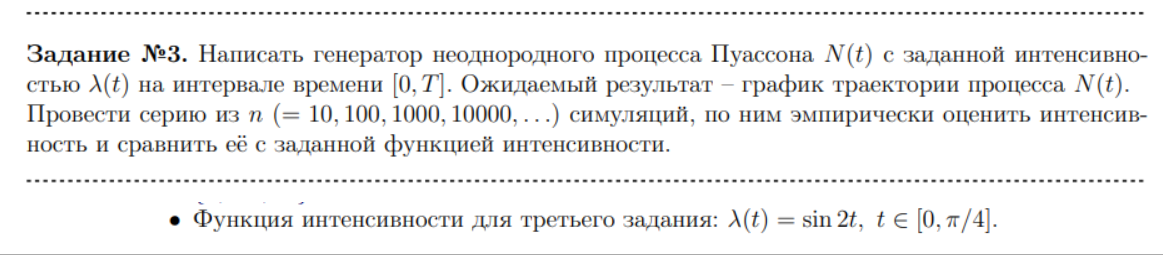

In [53]:
import numpy as np
from tqdm import tqdm
from scipy.stats import laplace, norm, poisson, uniform
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

In [54]:
T = np.pi/4

In [55]:
n_values = [10, 100, 1000, 10000, 100000]

In [56]:
def lambda_f(t):
    return np.sin(2*t)

$I = \int_0^T \lambda(t)dt =\int_0^{\frac{\pi}{4}} sin(2t)dt = -\frac{cos(2t)}{2}\mid_{0}^{\frac{\pi}{4}} = \frac{1}{2}$


$f(t) = \frac{\lambda(t)}{\frac{1}{2}} = 2\lambda(t) = 2sin(2t)$


$F(t) = \int_{-\infty}^t f(t)dt = -cos(2t)$


$F^{-1}(y) = \frac{arccos(-y)}{2}$

In [57]:
def f_reverse(y):
    return (np.arccos(-1*y)/2)

In [58]:
def F(t):
    return (-1*np.cos(2*t))

In [67]:
def generate(T, n):
    dist = poisson(mu = 1/2) # Create the distribution object
    N = dist.rvs(size = n)
    etas = uniform.rvs(size = n)
    return np.array(sorted(etas))

In [60]:
 def generate_N(N):
        samples = []
        for _ in range(N):
            samples.extend(generate(T, _))
        return np.array(sorted(samples))

In [61]:
def best_coefficient(intervals, heights):
        best_c = 0
        min_error = float('inf')
        for c in range(-1000, 1000, 1):
            real_points = [c * lambda_f(t) for t in intervals]
            l1_error = np.sum(np.abs(heights - np.array(real_points)))
            if l1_error < min_error:
                min_error = l1_error
                best_c = c
        return best_c

In [62]:
 def intervals_heights(T, sample):
        intervals = []
        heights = []
        dt = 0.01 if len(sample) < 500 else 0.2
        dts = np.arange(0, T, dt)
        for i in dts:
            intervals.append(i)
            c = 0
            for point in sample:
                if i < point <= i + dt:
                    c += 1
            heights.append(c)
        return intervals, heights

In [63]:
def approximation(T, sample, n):
        X = np.linspace(0, T, max(n_values))
        intervals, heights = intervals_heights(T, sample)
        best_c = best_coefficient(intervals, heights)
        plt.step(intervals, heights, label="Эмпирическая оценка симуляции")
        plt.plot(X, best_c * lambda_f(X), linestyle="--", color='r', label=f"C * λ(t), где c={best_c}")
        plt.legend()
        plt.xlabel("t")
        plt.show()

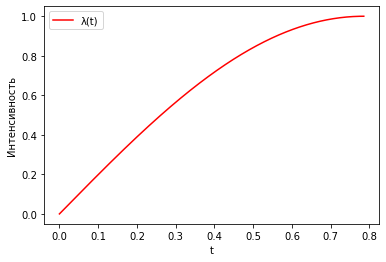

In [36]:
X = np.linspace(0, T, max(n_values))
plt.plot(X, lambda_f(X), color="r", label="λ(t)")
plt.xlabel("t")
plt.ylabel("Интенсивность")
plt.legend()
plt.show()

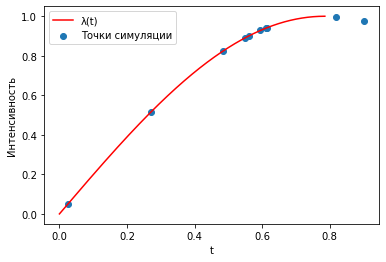

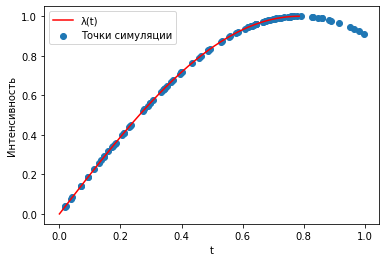

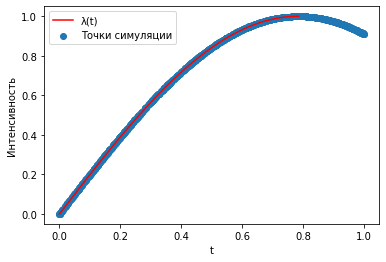

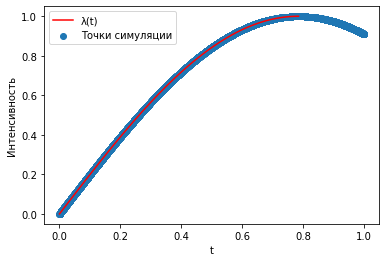

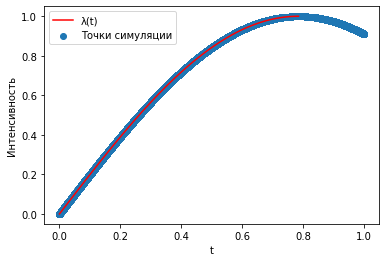

In [68]:
X = np.linspace(0, T, max(n_values))
for i, n in enumerate(n_values):
    sample = generate(T, n)
    plt.plot(X, lambda_f(X), color='r', label = "λ(t)")
    plt.scatter(sample, lambda_f(sample), label = "Точки симуляции")
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("Интенсивность")
    plt.show()

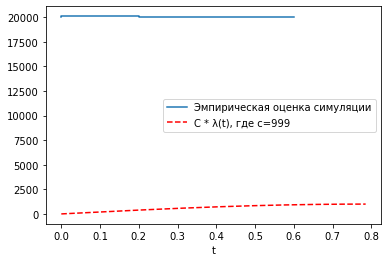

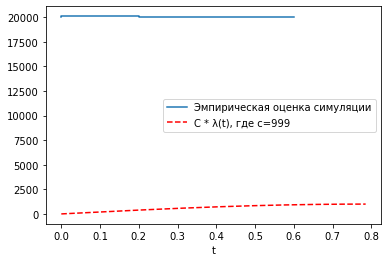

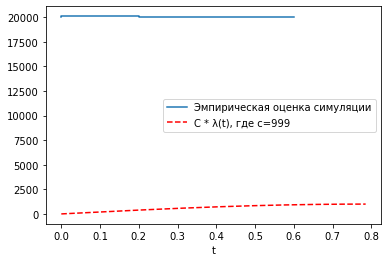

KeyboardInterrupt: 

In [64]:
for n in n_values:
    samples = generate_N(n)
#     approximation(T, samples, n)
    X = np.linspace(0, T, max(n_values))
    intervals, heights = intervals_heights(T, sample)
    best_c = best_coefficient(intervals, heights)
    plt.step(intervals, heights, label="Эмпирическая оценка симуляции")
    plt.plot(X, best_c * lambda_f(X), linestyle="--", color='r', label=f"C * λ(t), где c={best_c}")
    plt.legend()
    plt.xlabel("t")
    plt.show()